       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (to

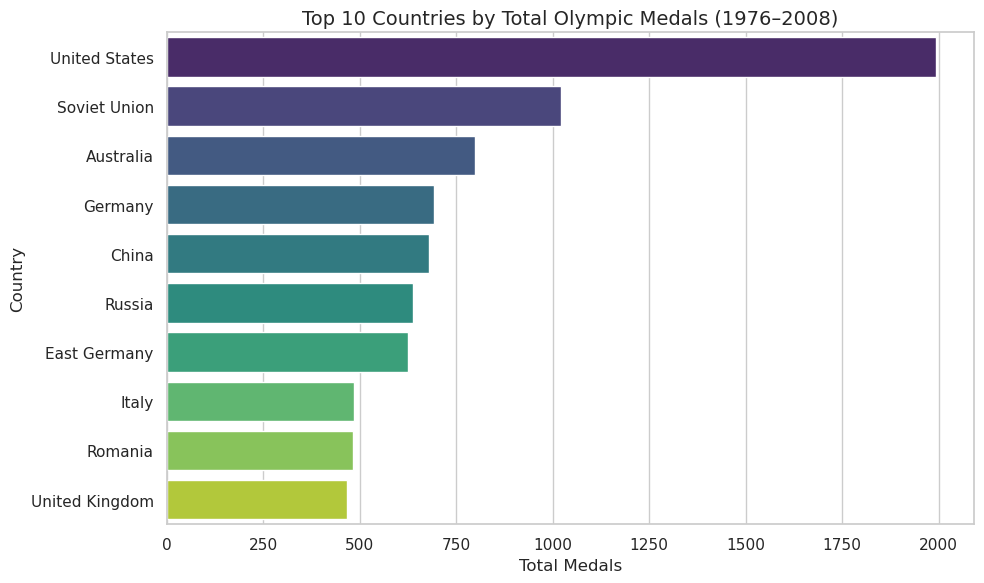

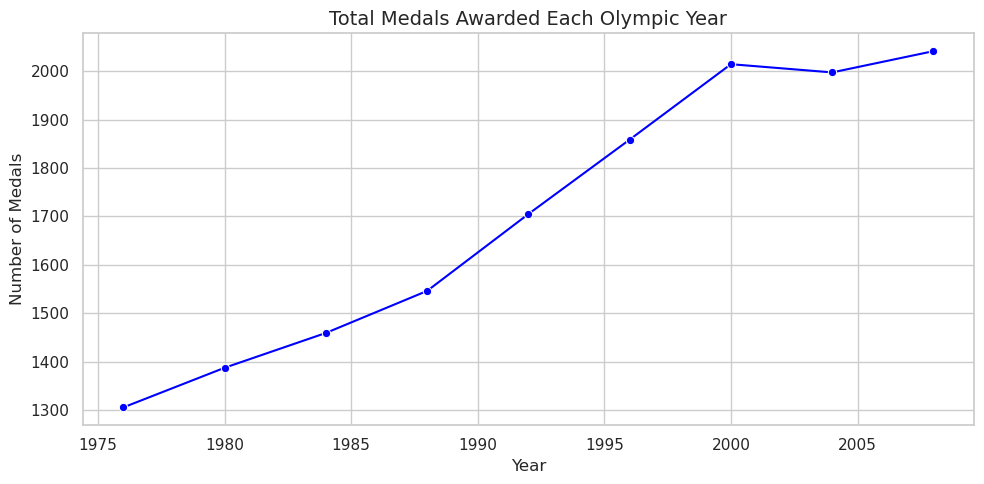

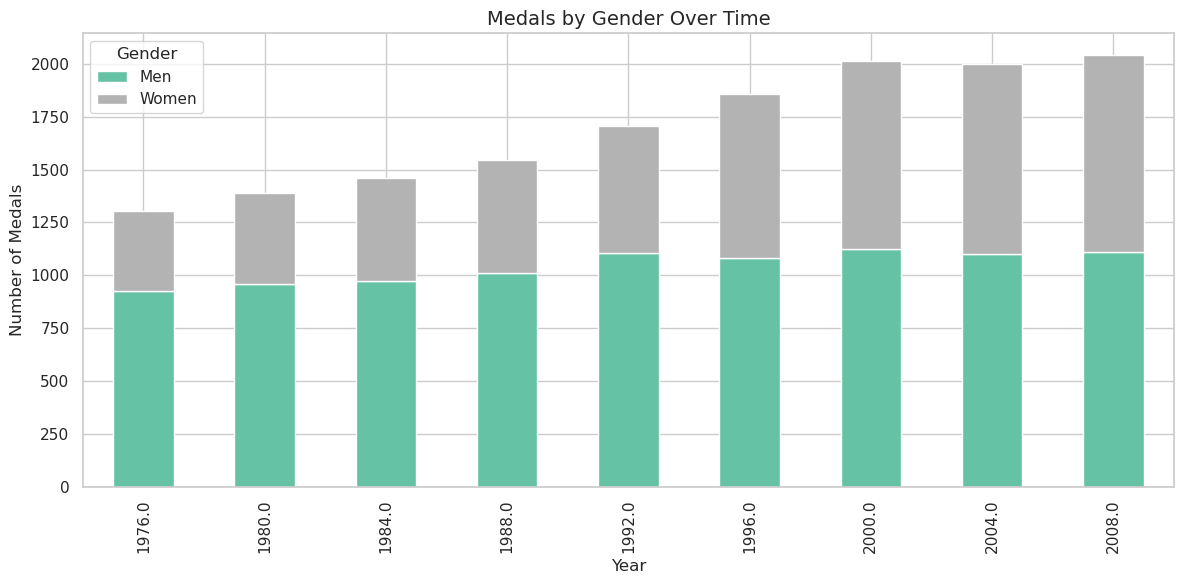

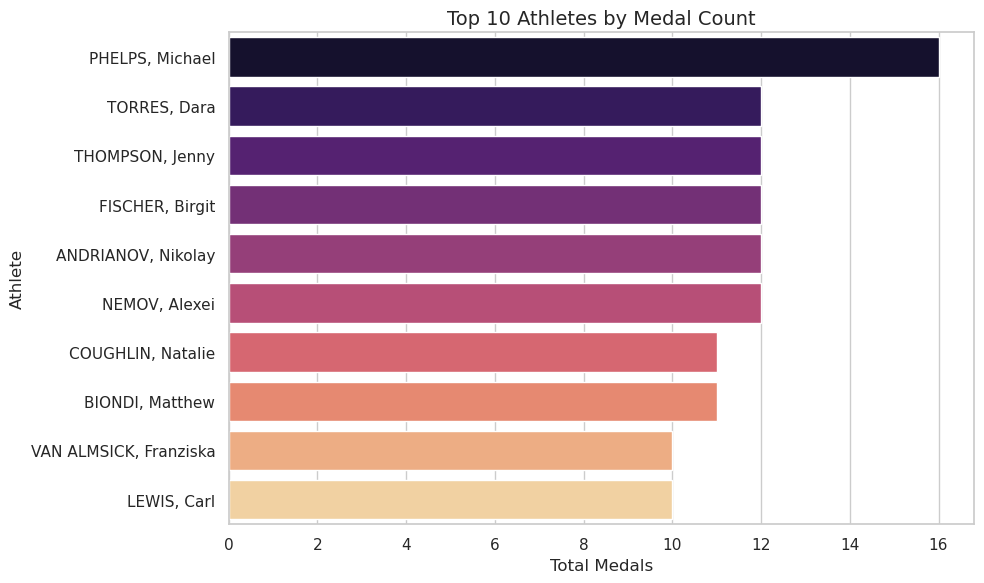

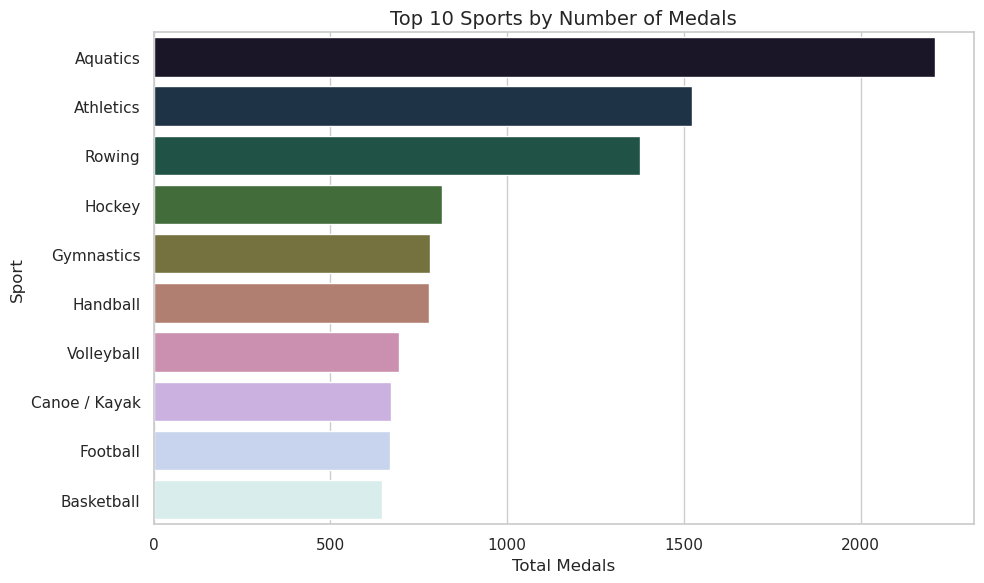


Classification Report:

              precision    recall  f1-score   support

           0       0.08      0.03      0.04      1520
           1       0.63      0.82      0.71      3075

    accuracy                           0.56      4595
   macro avg       0.35      0.43      0.38      4595
weighted avg       0.45      0.56      0.49      4595


Confusion Matrix:
 [[  46 1474]
 [ 546 2529]]


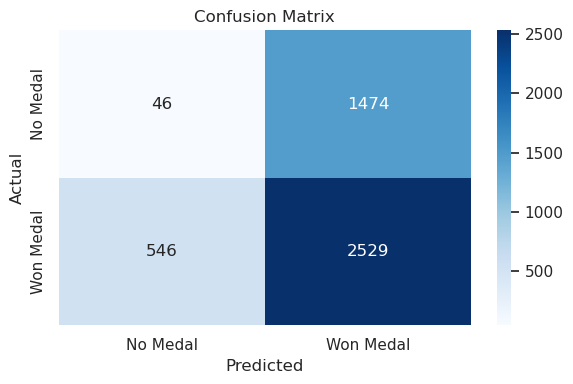

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os
import random

#  Load and clean the data
df=pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv' , encoding='ISO-8859-1')
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df_clear=df.dropna()
print(df_clear.info())


#EDA & Visualization Setup
sns.set(style="whitegrid")

# 1. Total Medals by Country
top_countries = df_cleaned['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Olympic Medals (1976–2008)", fontsize=14)
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 2. Total Medals by Year
medals_by_year = df_cleaned['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values, marker='o', color='blue')
plt.title("Total Medals Awarded Each Olympic Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Gender Participation Over Time
gender_year = df_cleaned.groupby(['Year', 'Gender']).size().unstack()
gender_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Medals by Gender Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4. Top Athletes by Total Medals
top_athletes = df_cleaned['Athlete'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_athletes.values, y=top_athletes.index, palette="magma")
plt.title("Top 10 Athletes by Medal Count", fontsize=14)
plt.xlabel("Total Medals")
plt.ylabel("Athlete")
plt.tight_layout()
plt.show()

# 5. Most Popular Sports by Medals
top_sports = df_cleaned['Sport'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sports.values, y=top_sports.index, palette="cubehelix")
plt.title("Top 10 Sports by Number of Medals", fontsize=14)
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

# 6. Predictive Analysis – Predict if an athlete will win a medal
df_model = df_cleaned[['Sport', 'Gender', 'Country', 'Event']].copy()
df_model['Won_Medal'] = 1  # All rows originally have medals

# Simulate non-medal rows
df_fake = df_model.sample(frac=0.5, random_state=42).copy()
df_fake['Won_Medal'] = 0
df_combined = pd.concat([df_model, df_fake], ignore_index=True)

# Encode categorical variables
le_dict = {}
for col in ['Sport', 'Gender', 'Country', 'Event']:
    le = LabelEncoder()
    df_combined[col] = le.fit_transform(df_combined[col])
    le_dict[col] = le
X = df_combined[['Sport', 'Gender', 'Country', 'Event']]
y = df_combined['Won_Medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Medal', 'Won Medal'], yticklabels=['No Medal', 'Won Medal'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



